In [ ]:
Q2.classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
#suppress warning messages generated by Python during the execution of your code.
warnings.filterwarnings("ignore")

In [3]:
#Read the CSV file into a DataFrame
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [31]:
#Performing EDA 
#display the summary statistics for given data
df.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

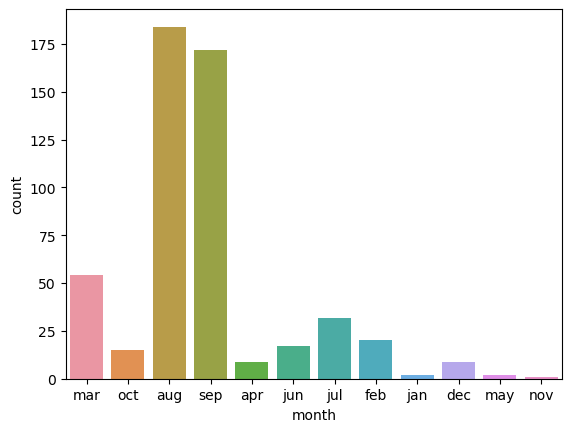

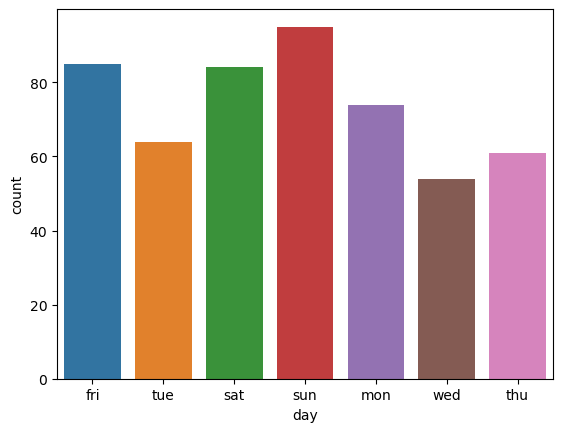

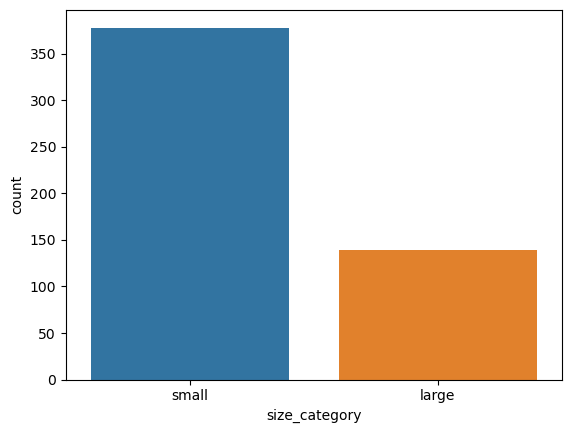

In [4]:
# Create count plots for the data
#create count plots to visualize the distribution of categories in various columns
sns.countplot(df['month'])
plt.show()
sns.countplot(df['day'])
plt.show()
sns.countplot(df['size_category'])
plt.show()

In [5]:
#T:This is a transpose operation that switches the rows and columns of the resulting summary statistics DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
 #applying the LabelEncoder to convert it from binary categorical values ('yes' or 'no') to numeric values.
LE = LabelEncoder()
df['month'] = LE.fit_transform(df['month'])
df['day'] = LE.fit_transform(df['day'])
df['size_category'] = LE.fit_transform(df['size_category'])


In [7]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# split a DataFrame into two parts
y=df['size_category']
x=df.drop('size_category',axis =1)

In [9]:
#split your data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(x,y)

In [10]:
##creating an instance of a Support Vector Classifier (SVC) mode
svc = SVC()

In [11]:
# fitting (SVC) model to your training data.
svc.fit(X_train,Y_train)

SVC()

In [12]:
#used (SVC) model to make predictions on both the training and test datasets.
Y_pred_train = svc.predict(X_train)

In [13]:
Y_pred_test = svc.predict(X_test)

In [14]:
#calculating and printing various performance metrics for your (SVC) model on both the training and test datasets
print("Accuracy score for train data : ",accuracy_score(Y_train,Y_pred_train))
print("Accuracy score for test data : ", accuracy_score(Y_test,Y_pred_test))
print("Confusion matrix for train data : ", confusion_matrix(Y_train,Y_pred_train))
print("Confusion matrix for test data : ", confusion_matrix(Y_test,Y_pred_test))

Accuracy score for train data :  0.7674418604651163
Accuracy score for test data :  0.7230769230769231
Confusion matrix for train data :  [[ 11  90]
 [  0 286]]
Confusion matrix for test data :  [[ 2 36]
 [ 0 92]]


In [15]:
#create a (SVM) classifier with a linear kernel
svc = SVC(kernel = 'linear')

In [16]:
#split your data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

In [17]:
# fitting (SVC) model to your training data.
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [18]:
#used (SVC) model to make predictions on both the training and test datasets.
Y_pred_train = svc.predict(X_train)

In [19]:
Y_pred_test = svc.predict(X_test)

In [20]:
#calculating and printing various performance metrics for your (SVC) model on both the training and test datasets
print("Accuracy score for train data : ", accuracy_score(Y_train,Y_pred_train))
print("Accuracy score for test data : ", accuracy_score(Y_test,Y_pred_test))
print("Confusion Matrix for train data : ",confusion_matrix(Y_train,Y_pred_train))
print("Confusion Matrix for test data : ", confusion_matrix(Y_test,Y_pred_test))

Accuracy score for train data :  1.0
Accuracy score for test data :  0.9743589743589743
Confusion Matrix for train data :  [[ 95   0]
 [  0 266]]
Confusion Matrix for test data :  [[ 42   2]
 [  2 110]]


In [21]:
#defining a set of hyperparameters and their corresponding values for tuning your Support Vector Classifier (SVC) model
params = [{'kernel':['linear'],'gamma':[50,10,5,1,0.5,0.1,0.05,0.01],'C':[15,14,13,12,11,10,5,1,0.5,0.1,0.05,0.01]}]

In [22]:
svc = SVC()

In [23]:
# creating (GSC) for hyperparameter tuning 
GSC = GridSearchCV(svc, params, cv=10)

In [25]:
#GSC will go through different combinations of hyperparameters, train and evaluate the model for each combination
GSC.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 5, 1, 0.5, 0.1, 0.05,
                                0.01],
                          'gamma': [50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01],
                          'kernel': ['linear']}])

In [26]:
#retrieve the best set of hyperparameters
GSC.best_params_

{'C': 0.01, 'gamma': 50, 'kernel': 'linear'}

In [27]:
#retrieve the best cross-validated score
GSC.best_score_

0.9805555555555554

In [28]:
#create a (SVM) classifier with a linear kernel and gamma parameters
svc =SVC(kernel = 'linear',gamma =50,C=15)

In [29]:
# fitting (SVC) model to your training data.
svc.fit(X_train,Y_train)

SVC(C=15, gamma=50, kernel='linear')

In [30]:
#used (SVC) model to make predictions on both the training and test datasets.
#calculating and printing Accuracy score for train and test data
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)
print("Accuracy score for train data : ",accuracy_score(Y_train,Y_pred_train))
print("Accuracy score for test data : ", accuracy_score(Y_test,Y_pred_test))

Accuracy score for train data :  1.0
Accuracy score for test data :  0.9743589743589743


In [ ]:
# classifying the "Size_Categorie" using an SVM is a standard classification task, and success will depend on proper data preprocessing, hyperparameter tuning, and the choice of evaluation metrics
#after observing the results the above model is effective